In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'sklearn'

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Example dataset
data = pd.DataFrame({
    'Feature1': [1, 2, 3, 4, 5],
    'Feature2': [5, 4, 3, 2, 1],
    'Target': [0, 1, 0, 1, 0]
})

# Split the dataset into features and target
X = data[['Feature1', 'Feature2']]
y = data['Target']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train your model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
feat_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot using seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feat_importance, palette='viridis')
plt.title('Feature Importances - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()



ModuleNotFoundError: No module named 'sklearn'

<Figure size 640x480 with 0 Axes>

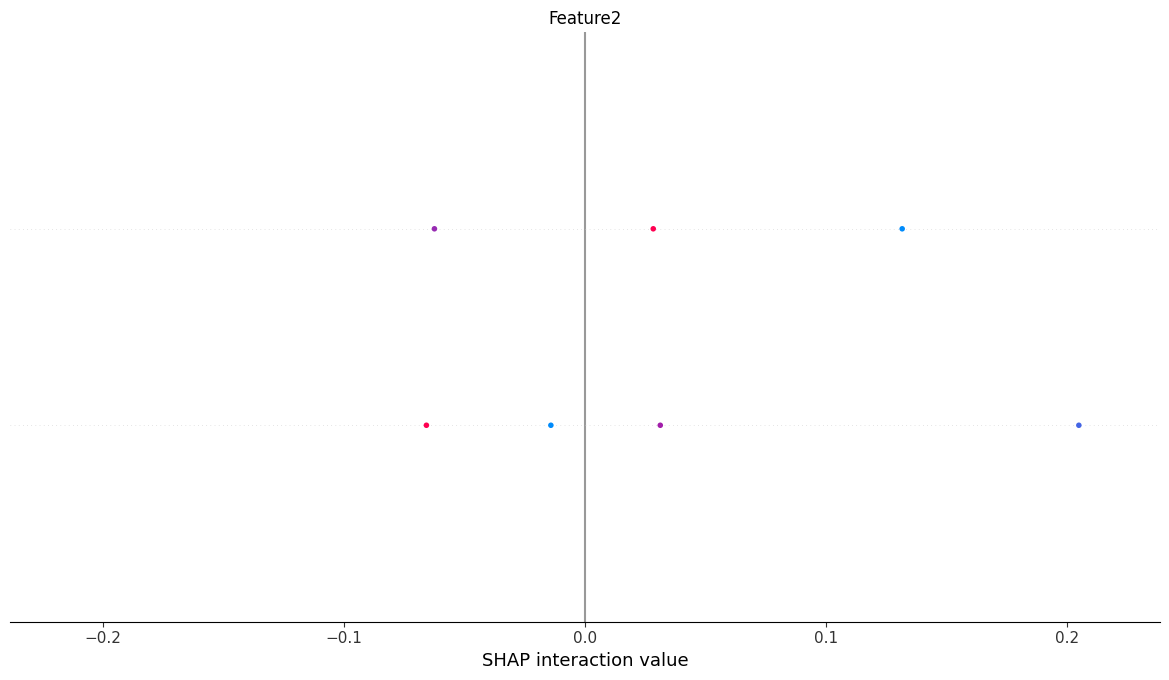

<Figure size 640x480 with 0 Axes>

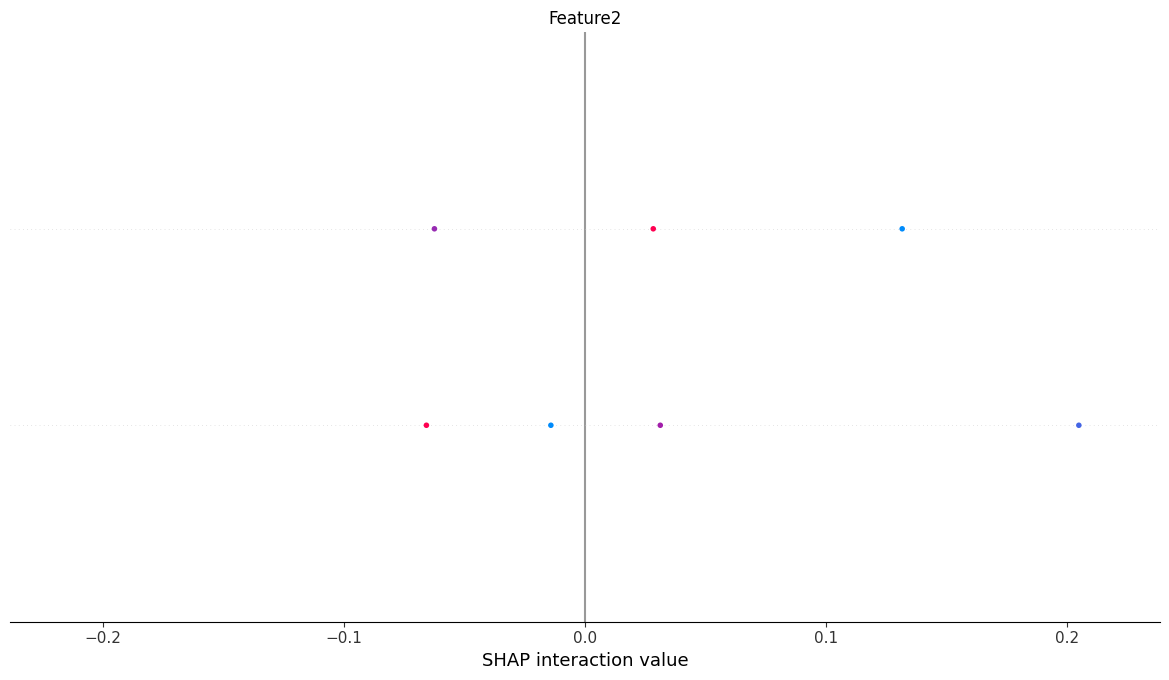

In [ ]:
import shap

# Create explainer
explainer = shap.TreeExplainer(model)
# Compute SHAP values for the training data
shap_values = explainer.shap_values(X_train)

# Ensure the correct SHAP values are selected for the positive class (class 1)
if isinstance(shap_values, list):  # For models with multiple outputs
	shap_values_class = shap_values[1]  # Adjust this index based on your target class
else:
	shap_values_class = shap_values  # For models with a single output

# Plot global feature importance
shap.summary_plot(shap_values_class, X_train, plot_type="bar")
# Or full summary
shap.summary_plot(shap_values_class, X_train)


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('c:/users/Risha/Downloads/archive/alzheimers_prediction_dataset.csv')

# Replace 'Feature1', 'Feature2', and 'Target' with actual column names from your dataset
X = df[['Age', 'BMI']]  # Replace with actual feature columns
y = df['Alzheimer’s Diagnosis']  # Replace with the actual target column

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

ModuleNotFoundError: No module named 'sklearn'